<a href="https://colab.research.google.com/github/SergioVinicio/Examenes-MINEDUC/blob/master/Examenes_MINEDUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [0]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf

#Dataset
El Archivo ya fue prelimpiado en R pero puede ser que aun contenga errores

In [0]:
from google.colab import files
uploaded = files.upload()

Saving DataColab.csv to DataColab.csv


In [0]:
data = pd.read_csv("DataColab.csv",encoding = "utf-8")

In [0]:
data.shape

(105322, 185)

In [0]:
data.dtypes

Unnamed: 0                               int64
Edad                                     int64
Sexo_RECO                                int64
Cod_Area                                 int64
Idiom_Mater_Hab                          int64
Idiom_Mater_Ent                          int64
Idiom_Mater_Lee                          int64
Idiom_Mater_Esc                          int64
IE_Frecuencia_Uso_Idioma_Materno_RECO    int64
Entiendo_Oirlo                           int64
Entiendo_Leerlo                          int64
Puedo_Escribir                           int64
Lo_Hablo                                 int64
Ed_Asistio_Preprimaria                   int64
Ed_Area_De_Escuela_Finalizo_Primaria     int64
Ed_Repitio_Algun_Grado_Primaria          int64
Gr_Primero                               int64
Gr_Segundo                               int64
Gr_Tercero                               int64
Gr_Cuarto                                int64
Gr_Quinto                                int64
Gr_Sexto     

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105322 entries, 0 to 105321
Columns: 185 entries, Unnamed: 0 to Completa
dtypes: float64(2), int64(183)
memory usage: 148.7 MB


In [0]:
data.describe()

,Unnamed: 0,Edad,Sexo_RECO,Cod_Area,Idiom_Mater_Hab,Idiom_Mater_Ent,Idiom_Mater_Lee,Idiom_Mater_Esc,IE_Frecuencia_Uso_Idioma_Materno_RECO,Entiendo_Oirlo,...,Maya_IMaterno,Extranjero_IMaterno,Xinca_IMaterno,Garifuna_IMaterno,Matutina,No_trabaja,Fin de semana,Vespertina,Mas_de_una_jornada,Completa
count,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,...,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000,105322.000000
mean,66599.917102,18.750356,0.502383,0.900410,0.923948,0.818452,0.765196,0.768966,2.806517,0.134122,...,0.128264,0.001367,0.000161,0.000285,0.072359,0.663119,0.081066,0.022987,0.003674,0.146313
std,39227.442997,3.449218,0.499997,0.299454,0.265083,0.385473,0.423878,0.421496,0.530345,0.340785,...,0.334385,0.036951,0.012704,0.016875,0.259083,0.472646,0.272937,0.149862,0.060506,0.353422
min,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.250000,17.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64893.500000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,100678.750000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,136976.000000,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


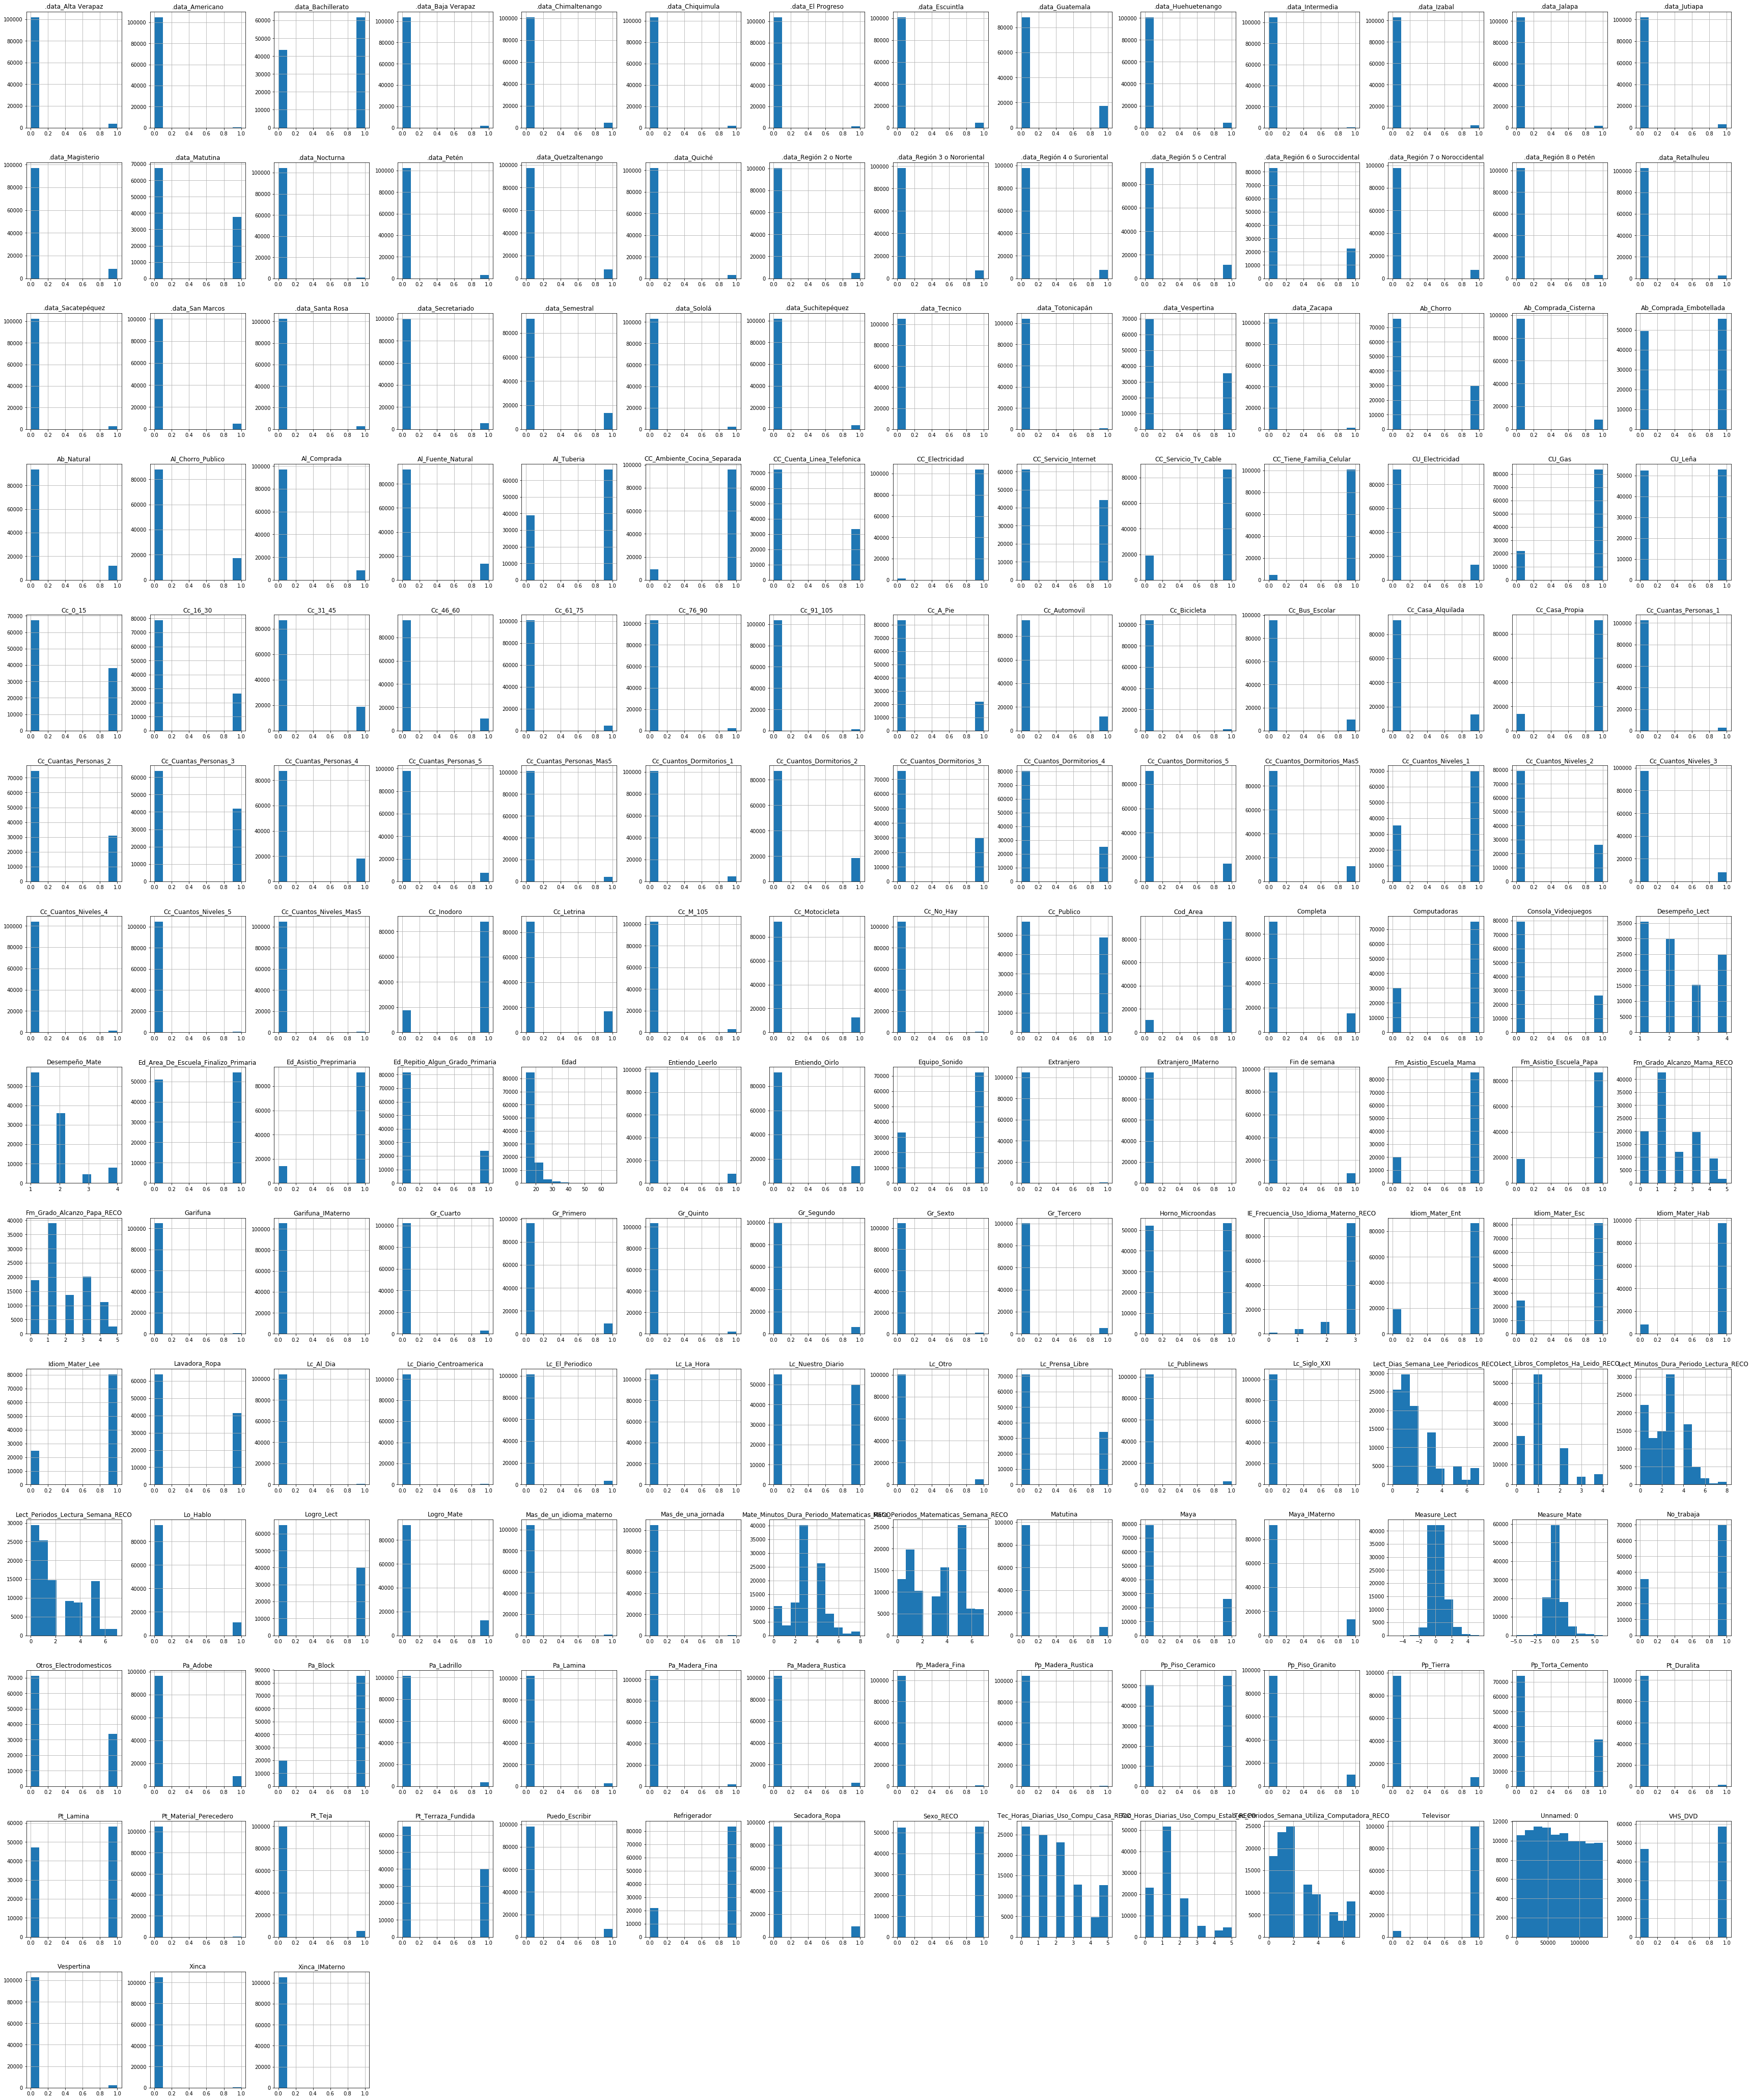

<Figure size 432x288 with 0 Axes>

In [0]:
data.hist(figsize=(60,75));
plt.figure();

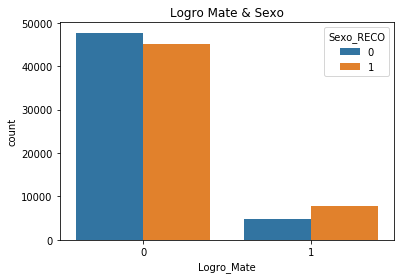

In [0]:
sns.countplot('Logro_Mate', hue='Sexo_RECO', data=data) 
plt.title('Logro Mate & Sexo') 
plt.show() 

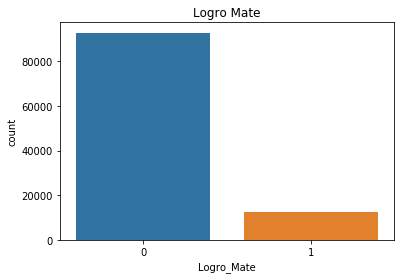

In [0]:
sns.countplot('Logro_Mate', data=data) 
plt.title('Logro Mate') 
plt.show() 

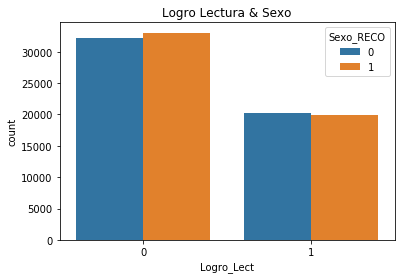

In [0]:
sns.countplot('Logro_Lect', hue='Sexo_RECO', data=data)
plt.title('Logro Lectura & Sexo')
plt.show()

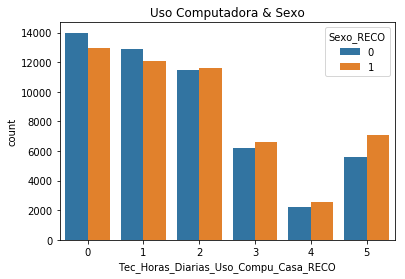

In [0]:
sns.countplot('Tec_Horas_Diarias_Uso_Compu_Casa_RECO', hue='Sexo_RECO', data=data)
plt.title('Uso Computadora & Sexo')
plt.show()

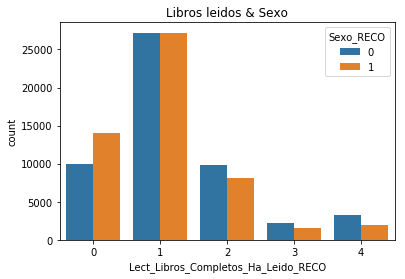

In [0]:
sns.countplot('Lect_Libros_Completos_Ha_Leido_RECO', hue='Sexo_RECO', data=data)
plt.title('Libros leidos & Sexo')
plt.show()

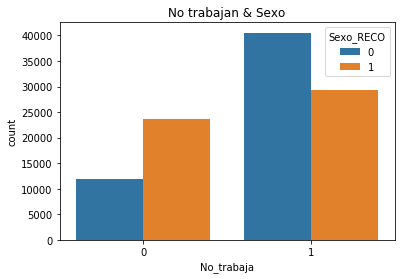

In [0]:
sns.countplot('No_trabaja', hue='Sexo_RECO', data=data)
plt.title('No trabajan & Sexo')
plt.show()

# Variable dependiente y predictores

In [0]:
#Definiendo los predictores
X = data.drop(["Unnamed: 0","Measure_Lect", "Measure_Mate","Desempeño_Lect","Desempeño_Mate","Logro_Lect","Logro_Mate"], axis = 1)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105322 entries, 0 to 105321
Columns: 178 entries, Edad to Completa
dtypes: int64(178)
memory usage: 143.0 MB


In [0]:
X.shape

(105322, 178)

In [0]:
Y = data[["Logro_Mate"]]

In [0]:
Y.shape

(105322, 1)

In [0]:
#Dividir en train y test set
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y) 

In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (78991, 178)
Training Labels Shape: (78991, 1)
Testing Features Shape: (26331, 178)
Testing Labels Shape: (26331, 1)


# Probando K-vecinos mas cercanos (no esta corriendo o se tarda demasiado)

In [0]:
#Matriz de confusion, Libreria
from sklearn.metrics import confusion_matrix 

In [0]:
# Entrenandolo
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train.values.ravel()) 

In [0]:
#Rendimiento
accuracy = knn.score(X_test, Y_test) 
print(accuracy) 

0.8708366564125936


In [0]:
#Matriz de confusion
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(Y_test, knn_predictions) 

In [0]:
#Imprimir la matriz de confusión
print(cm)

[[21753  1507]
 [ 1894  1177]]


In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     23260
           1       0.44      0.38      0.41      3071

   micro avg       0.87      0.87      0.87     26331
   macro avg       0.68      0.66      0.67     26331
weighted avg       0.86      0.87      0.87     26331



# Probando QDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [0]:
#Entrenando el modelo
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, Y_train.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [0]:
pred2=model2.predict(X_test)

In [0]:
accuracy_score(Y_test, pred2)

0.3622346283847936

In [0]:
print(confusion_matrix(pred2, Y_test))

[[ 6607   140]
 [16653  2931]]


In [0]:
print(np.unique(pred2, return_counts=True))
print(classification_report(Y_test, pred2, digits=3))

(array([0, 1]), array([ 6747, 19584]))
              precision    recall  f1-score   support

           0      0.979     0.284     0.440     23260
           1      0.150     0.954     0.259      3071

   micro avg      0.362     0.362     0.362     26331
   macro avg      0.564     0.619     0.350     26331
weighted avg      0.882     0.362     0.419     26331



#Probando LDA

In [0]:
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())
Y_pred2= lda.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
accuracy_score(Y_test, Y_pred2)

0.8949527173293836

In [0]:
confusion_matrix2 = confusion_matrix(Y_test, Y_pred2)
print(confusion_matrix2)

[[22505   755]
 [ 2011  1060]]


In [0]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     23260
           1       0.58      0.35      0.43      3071

   micro avg       0.89      0.89      0.89     26331
   macro avg       0.75      0.66      0.69     26331
weighted avg       0.88      0.89      0.88     26331



#Regresion Logistica

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
logreg = LogisticRegression()

In [0]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, Y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False False  True False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False  True  True False
 False False False  True  True  True  True False  T

In [0]:
logit_model=sm.Logit(Y_train.values.ravel(),X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.257248
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.300     
Dependent Variable:                 y                              AIC:                            40982.5986
Date:                               2019-04-30 18:51               BIC:                            42568.9809
No. Observations:                   78991                          Log-Likelihood:                 -20320.   
Df Model:                           170                            LL-Null:                        -29044.   
Df Residuals:                       78820                          LLR p-value:                    0.0000    
Converged:                          0.0000                         Scale:                          1.0000    
No. Iterations:                     35.0000                                                                  
----------------------------------------------------------

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
Y_predLR = logreg.predict(X_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.7f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.8973453


In [0]:
confusion_matrix = confusion_matrix(Y_test, Y_predLR)
print(confusion_matrix)

[[22760   500]
 [ 2203   868]]


In [0]:
print(classification_report(Y_test, Y_predLR))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     23260
           1       0.63      0.28      0.39      3071

   micro avg       0.90      0.90      0.90     26331
   macro avg       0.77      0.63      0.67     26331
weighted avg       0.88      0.90      0.88     26331



# Random Forest

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

##**Modelo simple**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
accuracy_score(Y_test, y_pred)

0.8983327636626031

In [0]:
confusion_matrixR = confusion_matrix(Y_test, y_pred)
print(confusion_matrixR)

[[22922   338]
 [ 2339   732]]


In [0]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     23260
           1       0.68      0.24      0.35      3071

   micro avg       0.90      0.90      0.90     26331
   macro avg       0.80      0.61      0.65     26331
weighted avg       0.88      0.90      0.88     26331



In [0]:
print('Accuracy QDA:', accuracy_score(Y_test, pred2))
print('Accuracy LDA:', accuracy_score(Y_test, Y_pred2))
print('Accuracy Random Forest Inicial con N = 20:', accuracy_score(Y_test, y_pred))
print('Accuracy Logistic Regression', logreg.score(X_test, Y_test))
print('Accuracy KNN:', accuracy)

Accuracy QDA: 0.3622346283847936
Accuracy LDA: 0.8949527173293836
Accuracy Random Forest Inicial con N = 20: 0.8983327636626031
Accuracy Logistic Regression 0.8973453343967187
Accuracy KNN: 0.8708366564125936


##Optimizando modelo de Random Forest

In [0]:
CRF = RandomForestClassifier(n_estimators = 1000)
CRF.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions = CRF.predict(X_test)

In [0]:
confusion_matrixR = confusion_matrix(Y_test, predictions)
print(confusion_matrixR)

[[22950   310]
 [ 2312   759]]


In [0]:
accuracy_score(Y_test, predictions)

0.9004215563404352

In [0]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23260
           1       0.71      0.25      0.37      3071

   micro avg       0.90      0.90      0.90     26331
   macro avg       0.81      0.62      0.66     26331
weighted avg       0.89      0.90      0.88     26331



In [0]:
importances = list(CRF.feature_importances_)

In [0]:
feature_list = list(X.columns)

In [0]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [0]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [0]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Fm_Grado_Alcanzo_Papa_RECO Importance: 0.04
Variable: Fm_Grado_Alcanzo_Mama_RECO Importance: 0.04
Variable: Mate_Periodos_Matematicas_Semana_RECO Importance: 0.04
Variable: Edad                 Importance: 0.03
Variable: Tec_Periodos_Semana_Utiliza_Computadora_RECO Importance: 0.03
Variable: Mate_Minutos_Dura_Periodo_Matematicas_RECO Importance: 0.03
Variable: Tec_Horas_Diarias_Uso_Compu_Estab_RECO Importance: 0.02
Variable: Tec_Horas_Diarias_Uso_Compu_Casa_RECO Importance: 0.02
Variable: Lect_Dias_Semana_Lee_Periodicos_RECO Importance: 0.02
Variable: Lect_Libros_Completos_Ha_Leido_RECO Importance: 0.02
Variable: Lect_Periodos_Lectura_Semana_RECO Importance: 0.02
Variable: Lect_Minutos_Dura_Periodo_Lectura_RECO Importance: 0.02
Variable: Sexo_RECO            Importance: 0.01
Variable: Idiom_Mater_Lee      Importance: 0.01
Variable: Ed_Area_De_Escuela_Finalizo_Primaria Importance: 0.01
Variable: Ed_Repitio_Algun_Grado_Primaria Importance: 0.01
Variable: Pp_Torta_Cemento     Im

#Nuevo modelo con variables importantes

In [0]:
X_Nueva = data[["Mate_Periodos_Matematicas_Semana_RECO","Fm_Grado_Alcanzo_Mama_RECO","Fm_Grado_Alcanzo_Papa_RECO","Mate_Minutos_Dura_Periodo_Matematicas_RECO",
               "Tec_Periodos_Semana_Utiliza_Computadora_RECO","Edad","Lect_Minutos_Dura_Periodo_Lectura_RECO","Lect_Periodos_Lectura_Semana_RECO",
               "Lect_Libros_Completos_Ha_Leido_RECO","Lect_Dias_Semana_Lee_Periodicos_RECO","Tec_Horas_Diarias_Uso_Compu_Casa_RECO",
                "Tec_Horas_Diarias_Uso_Compu_Estab_RECO"]]

In [0]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_Nueva, Y) 

In [0]:
CRF2 = RandomForestClassifier(n_estimators = 1000)
CRF2.fit(X2_train,Y2_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions2 = CRF2.predict(X2_test)

In [0]:
confusion_matrixR2 = confusion_matrix(Y2_test, predictions2)
print(confusion_matrixR2)

[[22735   515]
 [ 2295   786]]


In [0]:
accuracy_score(Y2_test, predictions2)

0.8932816831871179

In [0]:
print(classification_report(Y2_test, predictions2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     23250
           1       0.60      0.26      0.36      3081

   micro avg       0.89      0.89      0.89     26331
   macro avg       0.76      0.62      0.65     26331
weighted avg       0.87      0.89      0.87     26331

